<a href="https://colab.research.google.com/github/Archandra12/ADF_main/blob/master/DEFCON_WIP522.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="180" /></center>




### Table of Content

1. [Predict Fuel Efficiency Overview](#section1)<br>
2. [The DEFCON Dataset](#section2)<br>
  - 2.1 [Get the Data](#section201)<br>
  - 2.2 [Clean the Data](#section202)<br>
  - 2.3 [Split the Data into Train and Test](#section203)<br>
  - 2.4 [Inspect the Data](#section204)<br>
  - 2.5 [Split Features from Labels](#section205)<br>
  - 2.6 [Normalize the Data](#section206)<br>
3. [The Model](#section3)<br>
  - 3.1 [Build the Model](#section301)<br>
  - 3.2 [Inspect the Model](#section302)<br>
  - 3.3 [Train the Model](#section303)<br>
  - 3.4 [Make Predictions](#section304)<br>
4. [Model Tuning](#section4)<br>
  - 4.1 [Increasing the Number of Hidden Layers and Hidden Units](#section401)<br>
  - 4.2 [Weight Regularization](#section402)<br>
  - 4.3 [Dropout](#section403)<br>
  - 4.4 [Combined L2 + Dropout](#section404)<br>
  - 4.5 [Batch Normalization](#section405)<br>
5. [Conclusion](#section5)<br>

<a id=section1></a>
## 1. Predict DEFCON (Defense Readiness Condition)

Military conflict is an intense state of violence. In such situations, it is crucial for a nation to stay alert, cope with it, and mitigate its
implications. The DEFCON system allows the nation’s forces to be a step ahead of its rivals
A country has set up the DEFCON (Defense Readiness Condition) warning system. Defense readiness conditions (DEFCONs) describe progressive alert postures primarily for use between the Joint Chiefs of Staff and the commanders of unified commands.
DEFCONs are graduated to match situations of varying military severity. DEFCONs are phased increases in combat readiness.
It consists of five levels of readiness for the military forces to be prepared for the consequences of the conflict. In general terms, these are descriptions of DEFCONs:
- DEFCON 5 Normal peacetime readiness
- DEFCON 4 Normal, increased intelligence and - strengthened security measures
- DEFCON 3 Increase in force readiness above normal readiness
- DEFCON 2 Further Increase in force readiness, but less than maximum readiness
- DEFCON 1 Maximum force readiness.

As part of this excercise we will use Deep learning to train our models on dataset which has all necessary features to predict the DEFCON level required at a particular instance. We will analyse the data, train models, test their accuracies, verify their predictions. Main objective of this would be to use all the concepts required for ensuring the model predicts with best accuracy as DEFCON a mission critical task.

We will use the [DEFCON](https://github.com/Archandra12/Deeplearning-Project/blob/data/defcon_level.csv) Dataset and build a model to predict the DEFCON level for a given situation.



<center><img src="https://github.com/Archandra12/Deeplearning-Project/blob/images/DEFCON.jpg" width="340" height="80" /></center>

The DEFCON Dataset - Description

| Column                     |Description        |
| ---------------------------|--------------------------|		
|Allied_Nations|:The number of nations that have joined together as allies.|
|Diplomatic_Meetings_Set|:The number of meetings with the intent to resolve the conflict that is planned.|
|Percent_Of_Forces_Mobilized |:The percentage of forces mobilized.|
|Hostile_Nations |:The number of enemy nations that have allied together.|
|Active_Threats|:The number of situations or threats that require immediate attention.|
|Inactive_Threats|:The number of situations or threats being monitored for activity or escalation.|
|Citizen_Fear_Index|:The percentage of citizens who fear catastrophic military conflicts.|
|Closest_Threat_Distance(km) |:The closest threat to the border of the country in question.|
|Aircraft_Carriers_Responding|:The number of aircraft carriers actively traveling towards a threat to neutralize it.||
|Troops_Mobilized(thousands)|:The number of troops that are activated and responding to the threats being the most.|
|DEFCON_Level |:A numeric scale of conflict 'seriousness' with 1 being the least serious and 5 being the most. (**target variable**)|
|ID|:An ID to aid a checker script.|


<a id=section2></a>
## 2. Exploratory Data Analysis

<a id=section201></a>
### 2.1 Setup the environment

In [2]:
# To use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-fz4mukgj
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-fz4mukgj
     |████████████████████████████████| 1.0MB 2.9MB/s 
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.02af7ad07ad4d26f3bae069e055bb02187204576f_-cp37-none-any.whl size=151174 sha256=05d0820a965238a2944a22a7cbcf630291fef9eb273907da5f193e1067728705
  Stored in directory: /tmp/pip-ephem-wheel-cache-6mdcv540/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


In [3]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 2.1MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=007a83bf41ecd4147d84b6ce050ad7abe7f68ad6f1349197ca1c1e12ffdcc660
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=e5f760787dc52f76a73beb662f920b3550ffdabbf0b7179fd810579f3916345f
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [4]:
#importing common libraries
import pathlib
import numpy as np
import pandas as pd
#libraries for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import tensorflow
import tensorflow as tf
#import kerastuner, will be used for hyperparameter tuning
import kerastuner as kt
from kerastuner import HyperModel, RandomSearch, Hyperband, BayesianOptimization
#lets check the version of tensorflow nd keras tuner
print(tf.__version__)
print(kt.__version__)
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import itertools
from tensorflow.keras import models, layers
from kerastuner import HyperModel, RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, ReLU, LeakyReLU
from keras.callbacks import EarlyStopping

2.4.1
1.0.2


- Some useful functions

In [5]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    #plt.figure(1)
    for l in loss_list:
        ax1.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        ax1.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    ax1.set_title('Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    ## Accuracy
    #plt.figure(2)
    for l in acc_list:
        ax2.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        ax2.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    ax2.set_title('Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    plt.show()

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
## multiclass or binary report
## If binary (sigmoid output), set binary parameter to True
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=False):

    # 1. Transform one-hot encoded y_true into their class number
    if not binary:
        y_true = np.argmax(y_true,axis=1)
    
    # 2. Predict classes and stores in y_pred
    y_pred = model.predict_classes(x, batch_size=batch_size)
    
    # 3. Print accuracy score
    print("Accuracy : "+ str(accuracy_score(y_true,y_pred)))
    
    print("")
    
    # 4. Print classification report
    print("Classification Report")
    print(classification_report(y_true,y_pred,digits=5))    
    
    # 5. Plot confusion matrix
    cnf_matrix = confusion_matrix(y_true,y_pred)
    print(cnf_matrix)
    plot_confusion_matrix(cnf_matrix,classes=classes)

<a id=section202></a>
### 2.2 Get the Data

- Load data using Pandas Dataframe

In [7]:
dataset_path = 'https://raw.githubusercontent.com/Archandra12/Deeplearning-Project/data/defcon_level.csv'
dataset = pd.read_csv(dataset_path)
dataset.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3,7570
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4,12128
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3,2181
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,3,5946
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,2,9054


- We have a multiclass target variable in our dataset

<a id=section202></a>
### 2.2 Inspect the Data

- The dataset contains no unknown values.

In [8]:
dataset.isna().any().sum()

0

- Checking Unique values in ID column

In [9]:
dataset.ID.nunique()

10000

__Observation:__ ID column has unique values and we can drop it.

In [10]:
dataset.drop(['ID'], axis=1, inplace=True)

- As our target column is multiple class let's see the overall data distribution for DEFCON level

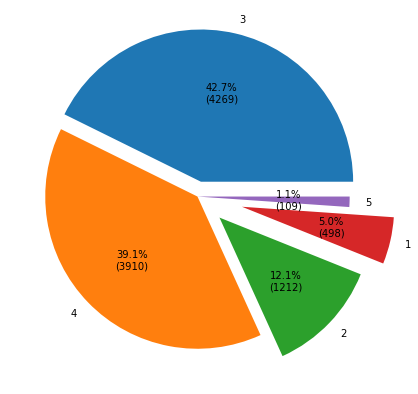

In [11]:
#dataset['DEFCON_Level'].value_counts().plot(kind='pie')
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
ig = plt.figure(figsize =(10, 7))    
data = dataset['DEFCON_Level'].value_counts()
explode = (0.1, 0.0, 0.2, 0.3, 0.0)
plt.pie(data, labels=dataset['DEFCON_Level'].unique(), autopct = lambda pct: func(pct, data), explode=explode)
plt.show()

__Observation:__ We can see that we have just above 1% of records for DEFCON level5 and 5% records for DEFCON level1. We must use Data sampling techniques to make our data balanced.

<a id=section203></a>
### 2.3 Split the Data into Train, Val, Test

- Now we will split the dataset into a training set , Validation set and a test set.
- As our dataset shows imbalane of classes, we will have to pass weights on our models

- We will use the test set in the final evaluation of our model.

In [12]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
val_dataset = train_dataset.sample(frac=0.2,random_state=0)
train_dataset = train_dataset.drop(val_dataset.index)
#checking the shpe of datasets
train_dataset.shape, val_dataset.shape, test_dataset.shape

((6400, 11), (1600, 11), (2000, 11))

- let's check data distribution

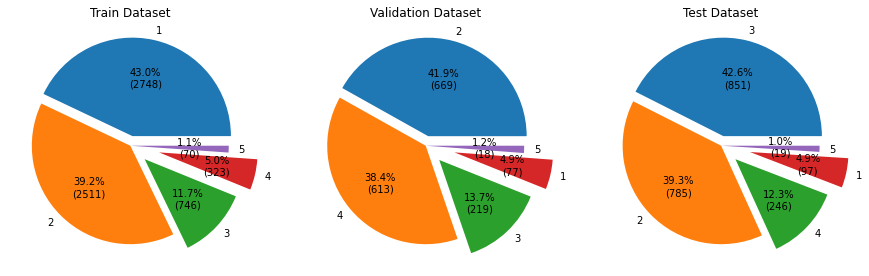

In [13]:
ig, axis = plt.subplots(1, 3, figsize=(15,15)) 
#ig = plt.figure(figsize =(15, 10))   

explode = (0.1, 0.0, 0.2, 0.3, 0.0)

data = train_dataset['DEFCON_Level'].value_counts()
axis[0].pie(data, labels=train_dataset['DEFCON_Level'].unique(), autopct = lambda pct: func(pct, data), explode=explode)

data = val_dataset['DEFCON_Level'].value_counts()
axis[1].pie(data, labels=val_dataset['DEFCON_Level'].unique(), autopct = lambda pct: func(pct, data), explode=explode)

data = test_dataset['DEFCON_Level'].value_counts()
axis[2].pie(data, labels=test_dataset['DEFCON_Level'].unique(), autopct = lambda pct: func(pct, data), explode=explode)
axis[0].title.set_text('Train Dataset')
axis[1].title.set_text('Validation Dataset')
axis[2].title.set_text('Test Dataset')
plt.show()

__Observation:__ Our dataset is distributed with proportionate count for each class

<a id=section204></a>
### 2.4 Basic EDA on the Train Data



Data Distribution based on DEFCON Level

- Drawing heatmap to see the correlation among variables

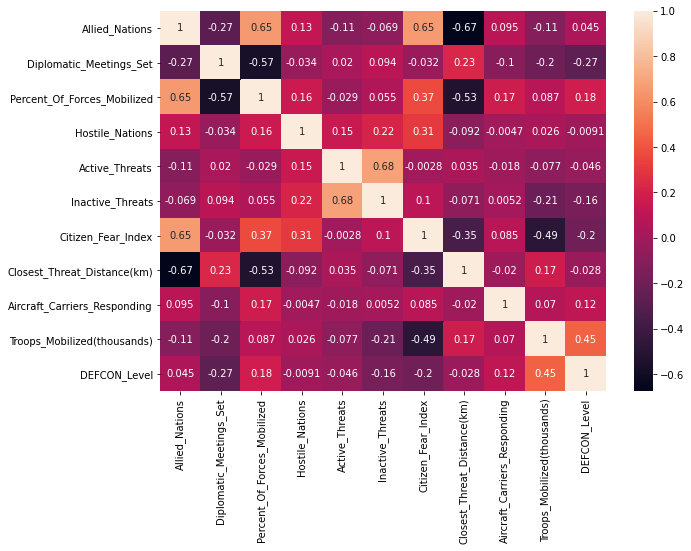

In [14]:
# plotting the heatmap

fig= plt.figure(figsize=(10,7))
hm = sns.heatmap(data = train_dataset.corr(), annot=True)
  
# displaying the plotted heatmap
plt.show()

- We will have a quick look at the joint distribution of a few pairs of columns from the training set.

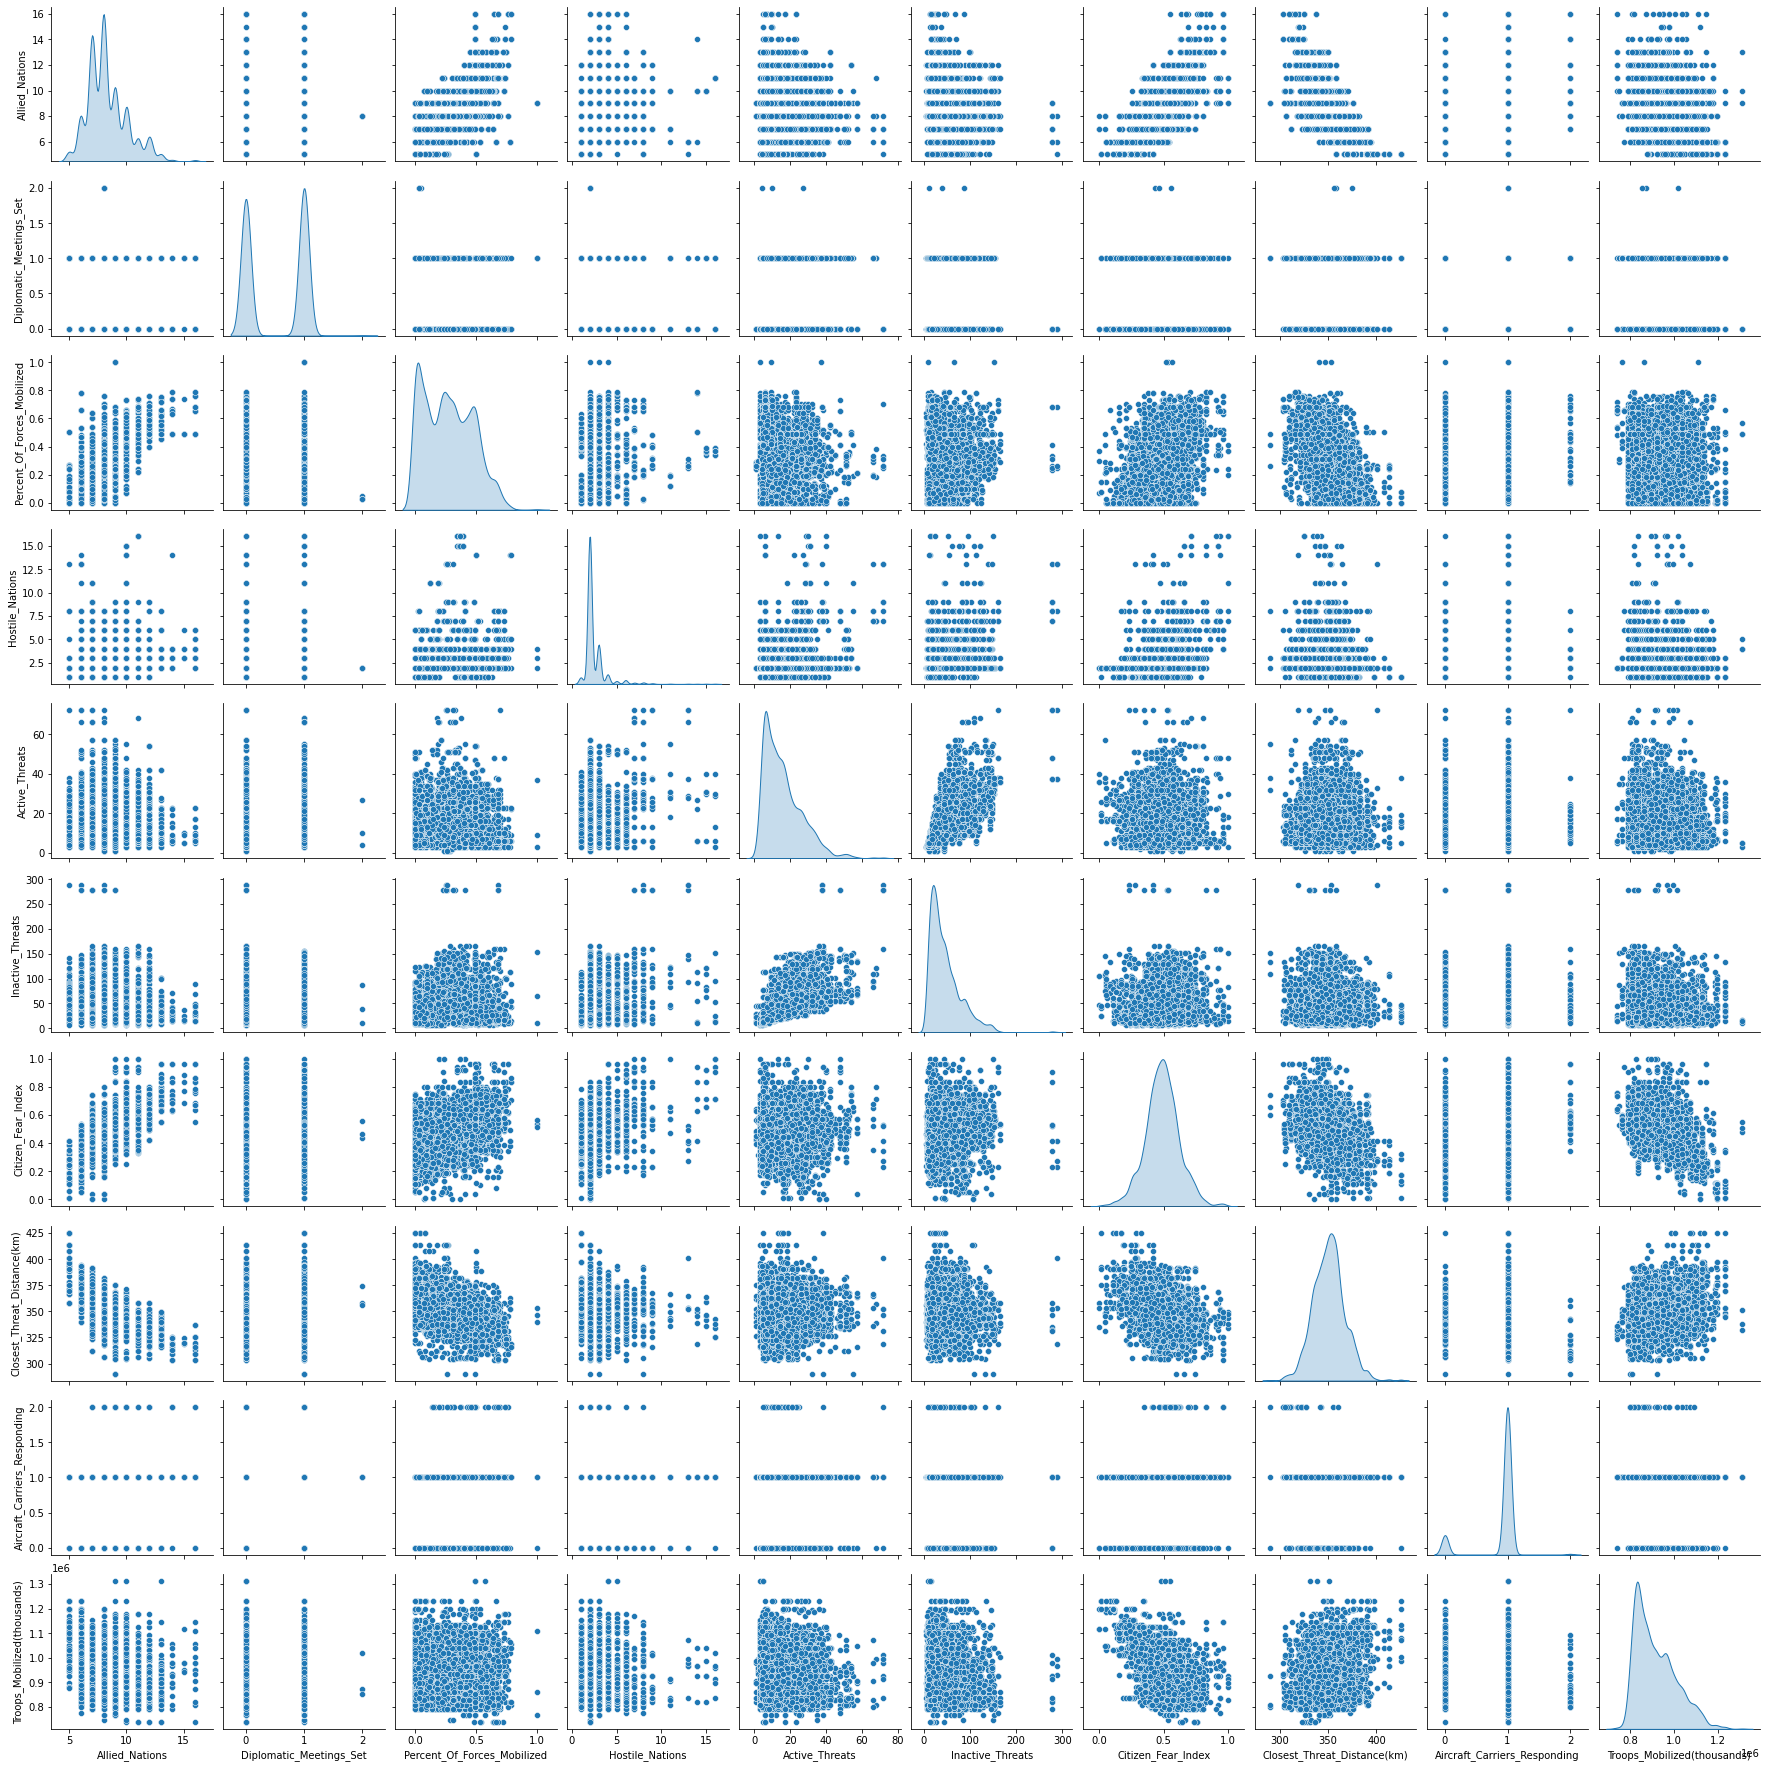

In [15]:
sns.pairplot(train_dataset[['Allied_Nations', 'Diplomatic_Meetings_Set', 'Percent_Of_Forces_Mobilized', 'Hostile_Nations', 'Active_Threats', 'Inactive_Threats', 'Citizen_Fear_Index', 'Closest_Threat_Distance(km)', 'Aircraft_Carriers_Responding', 'Troops_Mobilized(thousands)']], diag_kind="kde")

- Let's also look at the overall statistics:

In [16]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Allied_Nations,6400.0,8.322500,1.756125,5.00,7.000000,8.000000,9.000000,16.00
Diplomatic_Meetings_Set,6400.0,0.519531,0.500595,0.00,0.000000,1.000000,1.000000,2.00
Percent_Of_Forces_Mobilized,6400.0,0.271983,0.196898,0.00,0.090000,0.260000,0.430000,1.00
Hostile_Nations,6400.0,2.502656,1.325690,1.00,2.000000,2.000000,3.000000,16.00
Active_Threats,6400.0,15.781562,10.481334,1.00,7.000000,13.000000,21.000000,72.00
Inactive_Threats,6400.0,46.333672,33.556838,6.00,21.000000,37.000000,63.000000,289.00
Citizen_Fear_Index,6400.0,0.487290,0.134574,0.00,0.406021,0.486784,0.567548,1.00
Closest_Threat_Distance(km),6400.0,350.731475,16.345838,290.44,340.260000,350.860000,360.400000,425.06
Aircraft_Carriers_Responding,6400.0,0.888750,0.331403,0.00,1.000000,1.000000,1.000000,2.00
Troops_Mobilized(thousands),6400.0,917030.354167,92260.948597,739200.00,836000.000000,897600.000000,976800.000000,1311200.00


In [17]:
train_stats['mean']

Allied_Nations                       8.322500
Diplomatic_Meetings_Set              0.519531
Percent_Of_Forces_Mobilized          0.271983
Hostile_Nations                      2.502656
Active_Threats                      15.781562
Inactive_Threats                    46.333672
Citizen_Fear_Index                   0.487290
Closest_Threat_Distance(km)        350.731475
Aircraft_Carriers_Responding         0.888750
Troops_Mobilized(thousands)     917030.354167
DEFCON_Level                         2.608281
Name: mean, dtype: float64

__Observation:__ All features are in different scales. 

<a id=section205></a>
### 2.5 Split Features from Labels

- Separate the target value, or "label", from the features.

- This label is the value that we will train the model to predict.

In [18]:
X_train = train_dataset.loc[:, train_dataset.columns != 'DEFCON_Level']
y_train = train_dataset.DEFCON_Level

X_val = val_dataset.loc[:, train_dataset.columns != 'DEFCON_Level']
y_val = val_dataset.DEFCON_Level

X_test = test_dataset.loc[:, train_dataset.columns != 'DEFCON_Level']
y_test = test_dataset.DEFCON_Level

In [19]:
y_train.unique()

array([1, 2, 3, 4, 5])

- Label Encode the target variable and also perform one-hot encoding on them 

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#Label encode train target variable
le.fit(y_train)
y_train = le.transform(y_train)

#Label encode val target variable
le.fit(y_val)
y_val = le.transform(y_val)

#Label encode test target variable
le.fit(y_test)
y_test = le.transform(y_test)

# as our target variable is multiclass we will convert to dummy variables (i.e. one hot encoded) for training data
y_train_dummy = np_utils.to_categorical(y_train, num_classes=5)
# convert integers to dummy variables (i.e. one hot encoded) for training data
y_val_dummy = np_utils.to_categorical(y_val, num_classes=5)
# convert integers to dummy variables (i.e. one hot encoded) for training data
y_test_dummy = np_utils.to_categorical(y_test, num_classes=5)


In [21]:
# checking shapes of train nd test target variables 
print('Features Shape: ' , X_train.shape, X_val.shape, X_test.shape)
print('Target Shape: ' , y_train_dummy.shape, y_val_dummy.shape, y_test_dummy.shape)


Features Shape:  (6400, 10) (1600, 10) (2000, 10)
Target Shape:  (6400, 5) (1600, 5) (2000, 5)


<a id=section206></a>
### 2.6 Normalize the Data

- Looking at the `train_stats` block above we can see how different the ranges of each feature are.

- It is good practice to normalize features that use different scales and ranges.

- Although the model *might* converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input.

- **Note**: Although we intentionally generate these statistics from only the training dataset, these statistics will also be used to normalize the vaidation and test dataset.

  - We need to do that to project the test dataset into the same distribution that the model has been trained on.

In [22]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [23]:
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Allied_Nations,6400.0,8.322500,1.756125,5.00,7.000000,8.000000,9.000000,16.00
Diplomatic_Meetings_Set,6400.0,0.519531,0.500595,0.00,0.000000,1.000000,1.000000,2.00
Percent_Of_Forces_Mobilized,6400.0,0.271983,0.196898,0.00,0.090000,0.260000,0.430000,1.00
Hostile_Nations,6400.0,2.502656,1.325690,1.00,2.000000,2.000000,3.000000,16.00
Active_Threats,6400.0,15.781562,10.481334,1.00,7.000000,13.000000,21.000000,72.00
Inactive_Threats,6400.0,46.333672,33.556838,6.00,21.000000,37.000000,63.000000,289.00
Citizen_Fear_Index,6400.0,0.487290,0.134574,0.00,0.406021,0.486784,0.567548,1.00
Closest_Threat_Distance(km),6400.0,350.731475,16.345838,290.44,340.260000,350.860000,360.400000,425.06
Aircraft_Carriers_Responding,6400.0,0.888750,0.331403,0.00,1.000000,1.000000,1.000000,2.00
Troops_Mobilized(thousands),6400.0,917030.354167,92260.948597,739200.00,836000.000000,897600.000000,976800.000000,1311200.00


In [24]:
#Normalizing data for train and test
normed_X_train = norm(X_train)
normed_X_val = norm(X_val)
normed_X_test = norm(X_test)
print('Check the shape of normalized features datasets: ', normed_X_train.shape, normed_X_val.shape, normed_X_test.shape )

Check the shape of normalized features datasets:  (6400, 10) (1600, 10) (2000, 10)


- This normalized data is what we will use to train the model.

- **Caution**: The statistics used to normalize the inputs here (mean and standard deviation) need to be applied to any other data that is fed to the model, along with the one-hot encoding that we did earlier.

  - That includes the test set as well as live data when the model is used in production.

In [25]:
normed_X_train.describe()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands)
count,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03
mean,1.845746e-16,1.643824e-16,1.262386e-14,-3.193626e-17,1.196959e-18,1.141795e-16,9.579343e-15,-2.023154e-14,-3.711094e-16,-7.950758e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.891949e+00,-1.037828e+00,-1.381336e+00,-1.133490e+00,-1.410275e+00,-1.201951e+00,-3.620992e+00,-3.688491e+00,-2.681778e+00,-1.927472e+00
25%,-7.530784e-01,-1.037828e+00,-9.242472e-01,-3.791656e-01,-8.378287e-01,-7.549481e-01,-6.039044e-01,-6.406203e-01,3.356938e-01,-8.782736e-01
50%,-1.836429e-01,9.597957e-01,-6.085784e-02,-3.791656e-01,-2.653825e-01,-2.781452e-01,-3.760278e-03,7.862858e-03,3.356938e-01,-2.106022e-01
75%,3.857925e-01,9.597957e-01,8.025315e-01,3.751583e-01,4.978791e-01,4.966597e-01,5.963838e-01,5.914977e-01,3.356938e-01,6.478326e-01
max,4.371841e+00,2.957419e+00,3.697425e+00,1.018137e+01,5.363672e+00,7.231502e+00,3.809883e+00,4.547245e+00,3.353166e+00,4.272335e+00


<a id=section3></a>
## 3. The Models

<a id=section301></a>
### 3.1 Basic Model



#### 3.1.1 Model Definition

- Let's build our model.

11 inputs -> [8 hidden nodes] -> 5 outputs </br> Layer Activation: 'Relu'</br>
Output Layer Activation: “softmax” ; This is to ensure the output values are in the range of 0 and 1 and may be used as predicted probabilities.</br>
Finally, the network uses the efficient 'Adam' gradient descent optimization algorithm with a logarithmic loss function, which is called “categorical_crossentropy” in Keras. We will be evaulating 'Accuracy' of the model as metric

- The model building steps are wrapped in a function, `build_model`, since we'll create a second model, later on.

In [26]:
#Checking number of inputs features and output nodes
normed_X_train.shape[1], y_train_dummy.shape[1]

(10, 5)

- We have 5 outputs
- As we have imbalance data let's pass weights classes differently

In [27]:
def class_weight(labels_dict,mu=0.15):
  total = np.sum(labels_dict.values())
  keys = labels_dict.keys()
  weight = dict()
  for i in keys:
    score = np.log(mu*6400/float(labels_dict[i]))
    weight[i] = score if score > 1 else 1
  return weight
# random labels_dict
labels_dict = (train_dataset['DEFCON_Level']-1).value_counts().to_dict()
weights = class_weight(labels_dict)
weights
#print(labels_dict)
#total =np.sum(labels_dict.values())
#total

{0: 1.0892809612392254, 1: 1, 2: 1, 3: 1, 4: 2.6042534074205665}

- Define the model

In [28]:
input_shape = (normed_X_train.shape[1],)
input_shape
output_shape = y_train_dummy.shape[1]
output_shape

5

In [29]:
def build_model():
  model = Sequential()
  model.add(Dense(8, activation='relu', input_shape=input_shape,  kernel_initializer='zeros'))
  model.add(Dense(output_shape, activation='softmax'))  

  # Defining the optimizer with a specific learning rate of 0.001
  optimizer = tf.keras.optimizers.Adam(0.001)
  # Compiling the model
  model.compile( optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

  return model
model = build_model()

<a id=section302></a>
#### 3.1.2 Inspect the Model

- Using the `.summary` method to print a simple description of the model

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 88        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


- Our mode has just two layers and parmeters for first hidden layers are 88 (10(feasures) * 8 (nodes)=80 + 8 biases). Similarly for second layer we have 45 paramters (8 (inputs from first layer)*5(nodes)=40 + 5 biases)
- Now let's try out the model.

- without training the model taking a batch of `10` examples from the training data and calling `model.predict` on it.

In [31]:
example_batch = normed_X_train[:10]
example_result = model.predict(example_batch)
print('Shape of Predictions: ', example_result.shape)
example_result

Shape of Predictions:  (10, 5)


array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]], dtype=float32)

- It seems to be working, and it produces a result of the expected shape and type.

- We haven't trained the model yet, and as a result the above predictions are like this. 

<a id=section303></a>
#### 3.1.2 Train the Model

- Training the model for 200 epochs, and recording the training and validation accuracy in the `history` object.

- We are using `tfdocs.modeling.EpochDots()` callback to print a "." every epoch, with reports after each 100 epochs.

  - These print settings are the default values, i. e. printing a "." after each epoch and a report after 100 epochs.

  - We can change these as per our requirements in the callback.

In [32]:
EPOCHS = 200

In [33]:
history = model.fit(normed_X_train, y_train_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.4253,  loss:1.5769,  val_accuracy:0.4187,  val_loss:1.4822,  
....................
Epoch: 20, accuracy:0.4295,  loss:1.2655,  val_accuracy:0.4187,  val_loss:1.2154,  
....................
Epoch: 40, accuracy:0.4295,  loss:1.2651,  val_accuracy:0.4187,  val_loss:1.2129,  
....................
Epoch: 60, accuracy:0.4295,  loss:1.2652,  val_accuracy:0.4187,  val_loss:1.2128,  
....................
Epoch: 80, accuracy:0.4295,  loss:1.2651,  val_accuracy:0.4187,  val_loss:1.2127,  
....................
Epoch: 100, accuracy:0.4295,  loss:1.2652,  val_accuracy:0.4187,  val_loss:1.2128,  
....................
Epoch: 120, accuracy:0.4295,  loss:1.2652,  val_accuracy:0.4187,  val_loss:1.2127,  
....................
Epoch: 140, accuracy:0.4295,  loss:1.2652,  val_accuracy:0.4187,  val_loss:1.2128,  
....................
Epoch: 160, accuracy:0.4295,  loss:1.2652,  val_accuracy:0.4187,  val_loss:1.2127,  
....................
Epoch: 180, accuracy:0.4295,  loss:1.2651,  val_acc

<a id=section303></a>
#### 3.1.3 Model Evaluation

- Visualizing the model's training progress using the stats stored in the `history` object.

In [34]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,1.265141,0.429531,1.212705,0.41875,195
196,1.265134,0.429531,1.212577,0.41875,196
197,1.265131,0.429531,1.212732,0.41875,197
198,1.265121,0.429531,1.212654,0.41875,198
199,1.265159,0.429531,1.212715,0.41875,199


- Plotting the **accuracy** plot for train and val set.
- Plotting the **loss** plot for train and val set.

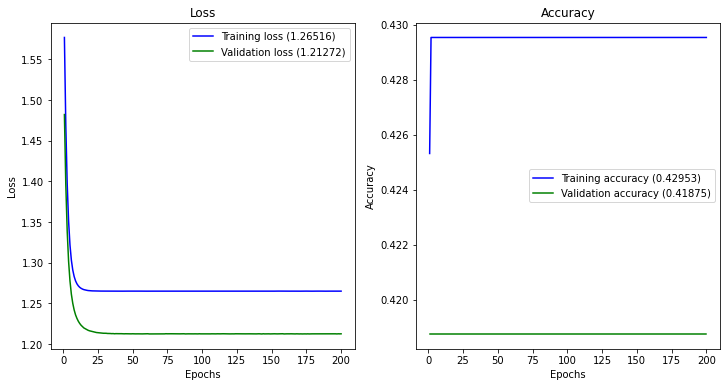

In [35]:
plot_history(history)

- Looking at Accuracy graph we can see training and validation accuracy does not reach beyond 45%. IT seems model is not earning enough to do predictions

- Also, it appears that model is not learning after certain epohs

- Let's update the `model.fit` call to automatically stop training when the validation score doesn't improve.

- We'll use an *EarlyStopping callback* that tests a training condition for  every epoch.

  - If a set amount of epochs elapses without showing improvement, then automatically stop the training. Here we are adding a patience of 20 epochs

- Full report on the Validation Set

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy : 0.41875

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000        78
           1    0.41875   1.00000   0.59031       670
           2    0.00000   0.00000   0.00000       614
           3    0.00000   0.00000   0.00000       219
           4    0.00000   0.00000   0.00000        19

    accuracy                        0.41875      1600
   macro avg    0.08375   0.20000   0.11806      1600
weighted avg    0.17535   0.41875   0.24719      1600

[[  0  78   0   0   0]
 [  0 670   0   0   0]
 [  0 614   0   0   0]
 [  0 219   0   0   0]
 [  0  19   0   0   0]]


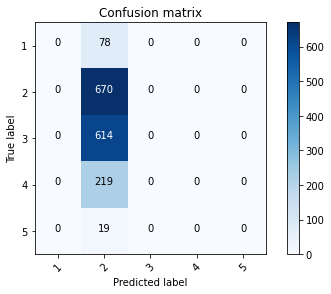

In [36]:
full_multiclass_report(model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

- Full report on Test Dataset

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy : 0.4255

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000        97
           1    0.42550   1.00000   0.59698       851
           2    0.00000   0.00000   0.00000       785
           3    0.00000   0.00000   0.00000       247
           4    0.00000   0.00000   0.00000        20

    accuracy                        0.42550      2000
   macro avg    0.08510   0.20000   0.11940      2000
weighted avg    0.18105   0.42550   0.25402      2000

[[  0  97   0   0   0]
 [  0 851   0   0   0]
 [  0 785   0   0   0]
 [  0 247   0   0   0]
 [  0  20   0   0   0]]


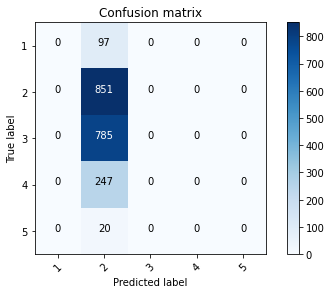

In [37]:
full_multiclass_report(model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

<a id=section303></a>
#### 3.1.4 Train the Model with Early Stopping

In [38]:
es_model = build_model()

In [39]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [40]:
early_history = es_model.fit(normed_X_train, y_train_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy), verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots( report_every=20)])





Epoch: 0, accuracy:0.4270,  loss:1.5770,  val_accuracy:0.4187,  val_loss:1.4825,  
....................
Epoch: 20, accuracy:0.4295,  loss:1.2656,  val_accuracy:0.4187,  val_loss:1.2153,  
....................
Epoch: 40, accuracy:0.4295,  loss:1.2651,  val_accuracy:0.4187,  val_loss:1.2126,  
....................
Epoch: 60, accuracy:0.4295,  loss:1.2651,  val_accuracy:0.4187,  val_loss:1.2127,  
.................

<a id=section303></a>
#### 3.1.5 Evaulate EarlyStopping model 

In [41]:
early_hist = pd.DataFrame(early_history.history)
early_hist['epoch'] = early_history.epoch
early_hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
72,1.265152,0.429531,1.212695,0.41875,72
73,1.265145,0.429531,1.212676,0.41875,73
74,1.265136,0.429531,1.212581,0.41875,74
75,1.265131,0.429531,1.212661,0.41875,75
76,1.265143,0.429531,1.212622,0.41875,76


- The training stopped before completing the 75 epochs due to our EarlyStopping callback as model was not showing improvement



- Plotting training history using HistoryPlotter

- Specifying the name of our **history** object in the `plotter.plot()` method.

- We also need to specify the **metric** we want to plot.

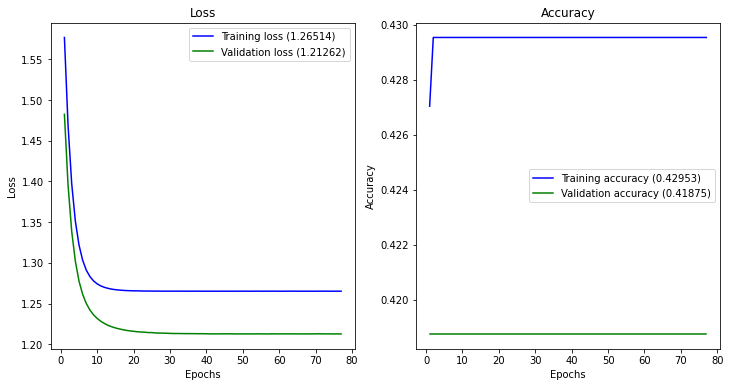

In [42]:
plot_history(early_history)

- Full Model performance report on Test dataset

In [43]:
normed_X_val.shape, y_val_dummy.shape

((1600, 10), (1600, 5))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy : 0.41875

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000        78
           1    0.41875   1.00000   0.59031       670
           2    0.00000   0.00000   0.00000       614
           3    0.00000   0.00000   0.00000       219
           4    0.00000   0.00000   0.00000        19

    accuracy                        0.41875      1600
   macro avg    0.08375   0.20000   0.11806      1600
weighted avg    0.17535   0.41875   0.24719      1600

[[  0  78   0   0   0]
 [  0 670   0   0   0]
 [  0 614   0   0   0]
 [  0 219   0   0   0]
 [  0  19   0   0   0]]


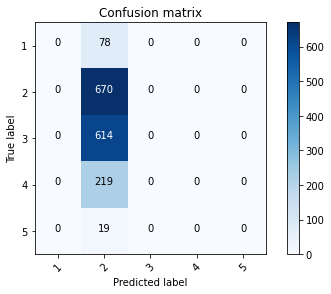

In [44]:
full_multiclass_report(es_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

- Full Model performance report on Test dataset

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy : 0.4255

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000        97
           1    0.42550   1.00000   0.59698       851
           2    0.00000   0.00000   0.00000       785
           3    0.00000   0.00000   0.00000       247
           4    0.00000   0.00000   0.00000        20

    accuracy                        0.42550      2000
   macro avg    0.08510   0.20000   0.11940      2000
weighted avg    0.18105   0.42550   0.25402      2000

[[  0  97   0   0   0]
 [  0 851   0   0   0]
 [  0 785   0   0   0]
 [  0 247   0   0   0]
 [  0  20   0   0   0]]


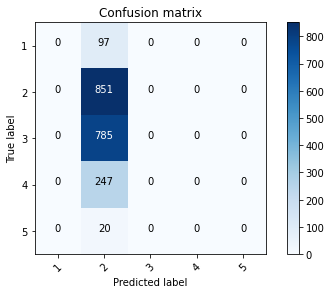

In [45]:
full_multiclass_report(es_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

- The graph shows that on the validation set, the average error is usually around **+/- 2 MPG**.

- Is this good? We'll leave that decision up to you.

- Let's see how well the model generalizes by using the **test** set, which we did not use when training the model.

- This tells us how well we can expect the model to predict when we use it in the real world.

- Model is giving high accuracy for training as well as for test. This could be due to data is synthatic

- Finally, **predict DEFCON levels** values using data in the testing set and comparing the results:
- Get ROC AUC Score 

- It looks like our model predicts reasonably well or we can say we have synthetic data so model has given near perfect results.

- We could see some false predictions for DEFCON level 5 

<a id=section4></a>
### 3.2. Model Tuning

- We have already achieved very good result on our test set.

- If we train the model for too long, the model will start to overfit and learn patterns from the training data that don't generalize to the test data.

  - We need to strike a balance.
  
  - We have already learned how to train for an appropriate number of epochs using the **Early Stopping** callback.

- And, now we will experiment some additional methods to **improve** the model **performance** and reduce overfitting.

  - These methods will all be applied during model building.

<a id=section401></a>
#### 3.2.1 Increasing the Number of Hidden Layers and Hidden Units

- We can improve model performance by increasing the number of hidden layers and hidden units in the model.

  - But this can result in overfitting.

- Here, we are increasing the number of **hidden layers** from 2 to **4** i. e. adding 2 additional layers.

- Next, we are using **32 hidden units** instead of 8.

- Define the Model

In [47]:
def build_model():
  model = Sequential()
  model.add(Dense(32, activation='relu', input_shape=input_shape))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(output_shape, activation='softmax'))  


  return model
multilayered_model = build_model()

- Inspect the Model

In [48]:
multilayered_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 165       
Total params: 3,685
Trainable params: 3,685
Non-trainable params: 0
_________________________________________________________________


- Compile the Model

Lets try with a different optimizer this time

In [49]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)
# Compiling the model
multilayered_model.compile( optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


- We are not using the Early Stopping callback now.

- The model will be trained for **20 epochs**.

In [50]:
history_multilayered = multilayered_model.fit(normed_X_train, y_train_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.5150,  loss:1.2021,  val_accuracy:0.5569,  val_loss:1.0259,  
....................
Epoch: 20, accuracy:0.5878,  loss:0.9636,  val_accuracy:0.5763,  val_loss:0.9691,  
....................
Epoch: 40, accuracy:0.6045,  loss:0.9130,  val_accuracy:0.5900,  val_loss:0.9750,  
....................
Epoch: 60, accuracy:0.6161,  loss:0.8775,  val_accuracy:0.5750,  val_loss:1.0299,  
....................
Epoch: 80, accuracy:0.6406,  loss:0.8422,  val_accuracy:0.5913,  val_loss:1.0574,  
....................
Epoch: 100, accuracy:0.6491,  loss:0.8268,  val_accuracy:0.5669,  val_loss:1.1150,  
....................
Epoch: 120, accuracy:0.6542,  loss:0.8001,  val_accuracy:0.5394,  val_loss:1.1947,  
....................
Epoch: 140, accuracy:0.6650,  loss:0.7796,  val_accuracy:0.5425,  val_loss:1.2832,  
....................
Epoch: 160, accuracy:0.6702,  loss:0.7595,  val_accuracy:0.5556,  val_loss:1.3221,  
....................
Epoch: 180, accuracy:0.6747,  loss:0.7646,  val_acc

In [51]:
df_multilayered_model = pd.DataFrame(history_multilayered.history)
df_multilayered_model['epoch'] = history_multilayered.epoch
df_multilayered_model.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,0.742994,0.675156,1.509533,0.536250,195
196,0.752091,0.684375,1.363752,0.531250,196
197,0.738747,0.675781,1.415884,0.533125,197
198,0.741852,0.681250,1.424958,0.526875,198
199,0.741646,0.680938,1.468157,0.532500,199


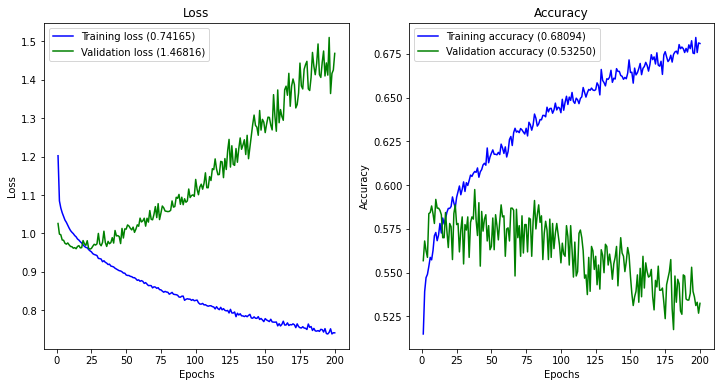

In [52]:
plot_history(history_multilayered)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.5325

Classification Report
              precision    recall  f1-score   support

           0    0.12766   0.07692   0.09600        78
           1    0.61799   0.70746   0.65971       670
           2    0.51215   0.48046   0.49580       614
           3    0.43787   0.33790   0.38144       219
           4    0.07317   0.15789   0.10000        19

    accuracy                        0.53250      1600
   macro avg    0.35377   0.35213   0.34659      1600
weighted avg    0.52235   0.53250   0.52459      1600

[[  6  49  20   2   1]
 [ 25 474 152  14   5]
 [ 12 221 295  71  15]
 [  4  23 101  74  17]
 [  0   0   8   8   3]]


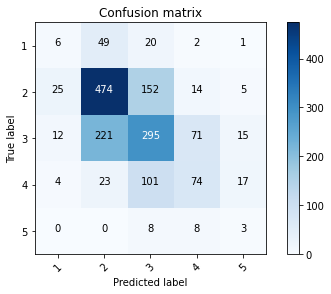

In [55]:
full_multiclass_report(multilayered_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.53

Classification Report
              precision    recall  f1-score   support

           0    0.18750   0.12371   0.14907        97
           1    0.60100   0.70623   0.64938       851
           2    0.53363   0.45478   0.49106       785
           3    0.38565   0.34818   0.36596       247
           4    0.09091   0.20000   0.12500        20

    accuracy                        0.53000      2000
   macro avg    0.35974   0.36658   0.35609      2000
weighted avg    0.52281   0.53000   0.52273      2000

[[ 12  63  17   5   0]
 [ 26 601 192  27   5]
 [ 25 294 357  97  12]
 [  1  42  95  86  23]
 [  0   0   8   8   4]]


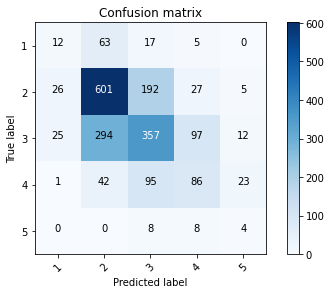

In [56]:
full_multiclass_report(multilayered_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

In [57]:
# evaluate the model
_, train_acc = multilayered_model.evaluate(normed_X_train, y_train_dummy, verbose=0)
_, test_acc = multilayered_model.evaluate(normed_X_test, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.698, Test: 0.530


- We get a slight increase in the test set results.

- It seems the deeper model is **overfitting** the train set.

- The performanceis still not up to the mark

- We will continue with other options to improve our model performance

<a id=section402></a>
#### 3.2.2 Weight Regularization

- Regularization places **constraints** on the quantity and type of information the model can store.

- If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most prominent patterns, which have a better chance of generalizing well.

- We can put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular".

- This is called "**weight regularization**", and it is done by adding to the loss function of the network a cost associated with having large weights.

- This cost comes in two flavors:

  - L1 regularization, where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).

  - L2 regularization, where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the squared "L2 norm" of the weights).
    - L2 regularization is also called weight decay in the context of neural networks.
    
    - Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.

- L1 regularization pushes weights towards exactly zero encouraging a sparse model.

- L2 regularization will penalize the weights parameters without making them sparse since the penalty goes to zero for small weights.

  - One reason why L2 is more common.

- In `tf.keras`, weight regularization is added by passing weight regularizer instances to layers as keyword arguments.

- Let's add L2 weight regularization to the model.

In [59]:
from tensorflow.keras import regularizers

In [60]:
def build_model():
  model = Sequential()
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(output_shape, activation='softmax'))  
  

  return model
l2_model = build_model()

- `l2(0.001)` means that every coefficient in the weight matrix of the layer will add `(0.001 * weight_coefficient_value**2)` to the total loss of the network.

In [61]:
l2_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 165       
Total params: 3,685
Trainable params: 3,685
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)
# Compiling the model
l2_model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [65]:
history_l2 = l2_model.fit(normed_X_train, y_train_dummy, class_weight=weights, epochs=2000, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=200)])


Epoch: 0, accuracy:0.6853,  loss:0.8393,  val_accuracy:0.5725,  val_loss:1.2655,  
........................................................................................................................................................................................................
Epoch: 200, accuracy:0.7000,  loss:0.8171,  val_accuracy:0.5738,  val_loss:1.3838,  
........................................................................................................................................................................................................
Epoch: 400, accuracy:0.7266,  loss:0.7974,  val_accuracy:0.5444,  val_loss:1.4943,  
........................................................................................................................................................................................................
Epoch: 600, accuracy:0.7355,  loss:0.7828,  val_accuracy:0.5537,  val_loss:1.6107,  
..........................................................

In [66]:
hist_l2 = pd.DataFrame(history_l2.history)
hist_l2['epoch'] = history_l2.epoch
hist_l2.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
1995,0.709917,0.779219,1.948951,0.536250,1995
1996,0.703478,0.788594,1.903604,0.533125,1996
1997,0.702145,0.780937,1.990984,0.531875,1997
1998,0.697152,0.788437,1.957743,0.536250,1998
1999,0.704100,0.784063,1.988651,0.542500,1999


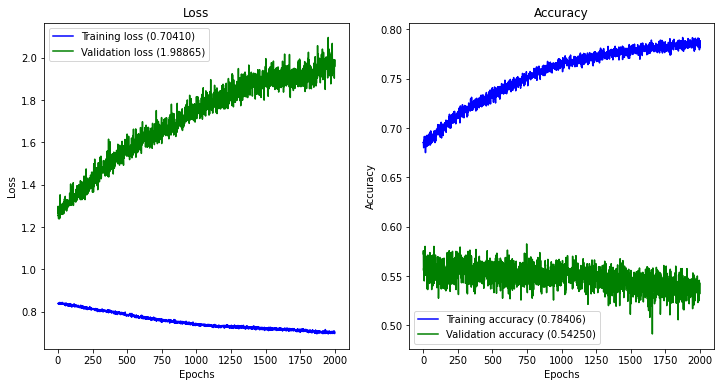

In [69]:
plot_history(history_l2)

- With more training model tries to learn more on training data but couldn't do well on validation data
- With regularization model improved just slightly.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.5425

Classification Report
              precision    recall  f1-score   support

           0    0.24000   0.23077   0.23529        78
           1    0.59532   0.75970   0.66754       670
           2    0.53640   0.45603   0.49296       614
           3    0.45802   0.27397   0.34286       219
           4    0.05882   0.05263   0.05556        19

    accuracy                        0.54250      1600
   macro avg    0.37771   0.35462   0.35884      1600
weighted avg    0.53022   0.54250   0.52776      1600

[[ 18  44  14   1   1]
 [ 37 509 106  15   3]
 [ 17 259 280  52   6]
 [  3  41 109  60   6]
 [  0   2  13   3   1]]


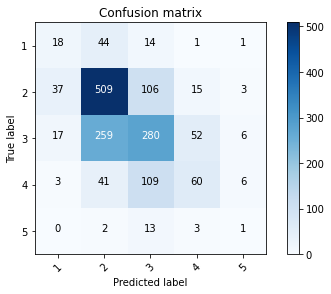

In [70]:
full_multiclass_report(l2_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.5145

Classification Report
              precision    recall  f1-score   support

           0    0.12727   0.14433   0.13527        97
           1    0.56882   0.73325   0.64066       851
           2    0.52913   0.41656   0.46614       785
           3    0.40127   0.25506   0.31188       247
           4    0.05556   0.05000   0.05263        20

    accuracy                        0.51450      2000
   macro avg    0.33641   0.31984   0.32132      2000
weighted avg    0.50600   0.51450   0.50117      2000

[[ 14  68  12   3   0]
 [ 61 624 148  16   2]
 [ 31 350 327  68   9]
 [  3  53 122  63   6]
 [  1   2   9   7   1]]


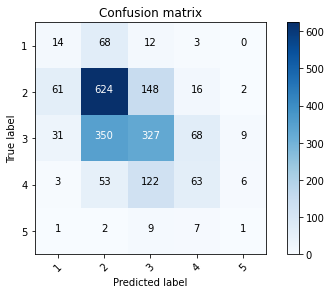

In [71]:
full_multiclass_report(l2_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

In [72]:
# evaluate the model
_, train_acc = l2_model.evaluate(normed_X_train, y_train_dummy, verbose=0)
_, test_acc = l2_model.evaluate(normed_X_test, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.790, Test: 0.515


- After adding L2 regularization, the test set error is reduced.

- The performance on the test set is better than the larger model.

- The L2 regularized model is much more resistant to overfitting than the larger model.

<a id=section403></a>
### 4.3 Dropout

- Dropout is one of the **most effective** and **most commonly used** regularization techniques for neural networks, developed by Hinton and his students at the University of Toronto.

- The intuitive explanation for dropout is that because individual nodes in the network cannot rely on the output of the others, each node must output features that are useful on their own.

- Dropout, applied to a layer, consists of **randomly** "**dropping out**" (i.e. set to zero) a number of **output features** of the layer during training.

  - Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training.
  
  - After applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1].

- The "**dropout rate**" is the fraction of the features that are being zeroed-out; it is usually set between **0.2** and **0.5**.

- *At test time*, **no units are dropped out**, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

- In `tf.keras` we can introduce dropout in a network via the Dropout layer, which gets applied to the output of layer right before.

- Let's add Dropout layers in our network to see how well they do at reducing overfitting.

In [75]:
def build_model():
  model = Sequential()
  model.add(Dense(256, activation='relu', input_shape=input_shape))
  model.add(Dropout(0.2))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(output_shape, activation='softmax'))    

  return model
dropout_model = build_model()

In [76]:
dropout_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 256)               2816      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)              

In [77]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)
# Compiling the model
dropout_model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [78]:
history_dropout = dropout_model.fit(normed_X_train, y_train_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.5283,  loss:1.1518,  val_accuracy:0.5337,  val_loss:1.0222,  
....................
Epoch: 20, accuracy:0.5638,  loss:1.0372,  val_accuracy:0.5506,  val_loss:0.9946,  
....................
Epoch: 40, accuracy:0.5734,  loss:1.0151,  val_accuracy:0.5775,  val_loss:1.0150,  
....................
Epoch: 60, accuracy:0.5858,  loss:1.0054,  val_accuracy:0.5775,  val_loss:1.0949,  
....................
Epoch: 80, accuracy:0.6020,  loss:0.9880,  val_accuracy:0.5781,  val_loss:1.1810,  
....................
Epoch: 100, accuracy:0.5955,  loss:1.0272,  val_accuracy:0.5806,  val_loss:1.2047,  
....................
Epoch: 120, accuracy:0.5980,  loss:0.9956,  val_accuracy:0.5663,  val_loss:1.2721,  
....................
Epoch: 140, accuracy:0.6137,  loss:0.9902,  val_accuracy:0.5825,  val_loss:1.4178,  
....................
Epoch: 160, accuracy:0.6031,  loss:1.0224,  val_accuracy:0.5738,  val_loss:1.4517,  
....................
Epoch: 180, accuracy:0.6050,  loss:1.0486,  val_acc

In [79]:
hist_dropout = pd.DataFrame(history_dropout.history)
hist_dropout['epoch'] = history_dropout.epoch
hist_dropout.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,0.992411,0.605469,1.627770,0.587500,195
196,1.025209,0.608594,1.944668,0.565000,196
197,1.031560,0.610781,1.721599,0.570625,197
198,0.987057,0.603125,1.916192,0.570625,198
199,1.008655,0.615469,1.825726,0.584375,199


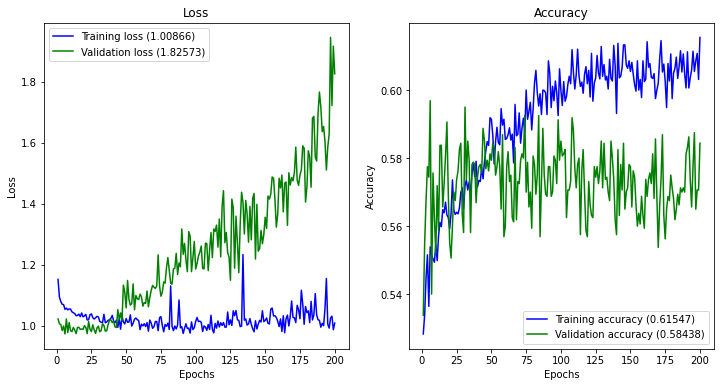

In [80]:
plot_history(history_dropout)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.584375

Classification Report
              precision    recall  f1-score   support

           0    0.50000   0.10256   0.17021        78
           1    0.64562   0.74776   0.69295       670
           2    0.52844   0.57492   0.55070       614
           3    0.54839   0.31050   0.39650       219
           4    0.31250   0.26316   0.28571        19

    accuracy                        0.58437      1600
   macro avg    0.50699   0.39978   0.41922      1600
weighted avg    0.57629   0.58437   0.56746      1600

[[  8  48  22   0   0]
 [  4 501 158   5   2]
 [  2 208 353  44   7]
 [  2  17 130  68   2]
 [  0   2   5   7   5]]


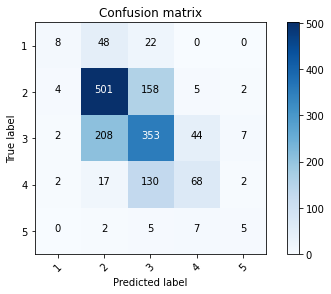

In [81]:
full_multiclass_report(dropout_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.591

Classification Report
              precision    recall  f1-score   support

           0    0.27273   0.06186   0.10084        97
           1    0.64293   0.75323   0.69372       851
           2    0.56189   0.58981   0.57551       785
           3    0.53077   0.27935   0.36605       247
           4    0.11111   0.15000   0.12766        20

    accuracy                        0.59100      2000
   macro avg    0.42389   0.36685   0.37276      2000
weighted avg    0.57400   0.59100   0.57244      2000

[[  6  64  26   0   1]
 [ 13 641 187   9   1]
 [  3 265 463  44  10]
 [  0  27 139  69  12]
 [  0   0   9   8   3]]


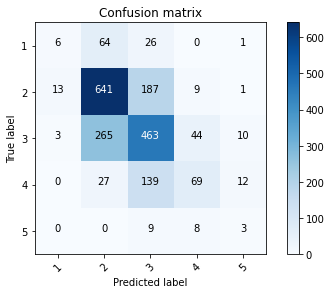

In [82]:
full_multiclass_report(dropout_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

In [83]:
# evaluate the model
_, train_acc = dropout_model.evaluate(normed_X_train, y_train_dummy, verbose=0)
_, test_acc = dropout_model.evaluate(normed_X_test, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.654, Test: 0.591


- After adding the dropout the model is generalizing well on the test set.

- The performance is better than the larger model.

<a id=section404></a>
### 4.4 Combined L2 + Dropout

- We can also combine both L2 regularization and Dropout in a single model.

In [ ]:
from tensorflow.keras import regularizers

In [84]:
def build_model():
  model = Sequential()
  model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
  model.add(Dropout(0.2))
  model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dropout(0.2))
  model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dropout(0.2))
  model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(output_shape, activation='softmax'))  

  return model
l2_dropout_model = build_model()

In [85]:
l2_dropout_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               5632      
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)              

In [86]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)
# Compiling the model
l2_dropout_model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [87]:
history_l2_dropout = l2_dropout_model.fit(normed_X_train, y_train_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])



Epoch: 0, accuracy:0.5214,  loss:1.8063,  val_accuracy:0.5294,  val_loss:1.3401,  
....................
Epoch: 20, accuracy:0.5641,  loss:1.0802,  val_accuracy:0.5738,  val_loss:1.0300,  
....................
Epoch: 40, accuracy:0.5642,  loss:1.0646,  val_accuracy:0.5738,  val_loss:1.0252,  
....................
Epoch: 60, accuracy:0.5702,  loss:1.0609,  val_accuracy:0.5763,  val_loss:1.0228,  
....................
Epoch: 80, accuracy:0.5600,  loss:1.0591,  val_accuracy:0.5850,  val_loss:1.0106,  
....................
Epoch: 100, accuracy:0.5697,  loss:1.0442,  val_accuracy:0.6006,  val_loss:1.0080,  
....................
Epoch: 120, accuracy:0.5723,  loss:1.0504,  val_accuracy:0.5850,  val_loss:1.0178,  
....................
Epoch: 140, accuracy:0.5814,  loss:1.0440,  val_accuracy:0.5869,  val_loss:1.0206,  
....................
Epoch: 160, accuracy:0.5803,  loss:1.0438,  val_accuracy:0.5819,  val_loss:1.0204,  
....................
Epoch: 180, accuracy:0.5816,  loss:1.0401,  val_acc

In [88]:
hist_l2_dropout = pd.DataFrame(history_l2_dropout.history)
hist_l2_dropout['epoch'] = history_l2_dropout.epoch
hist_l2_dropout.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,1.043453,0.584375,1.002539,0.603125,195
196,1.040025,0.582187,1.011928,0.590625,196
197,1.050084,0.578594,1.009099,0.610000,197
198,1.043881,0.583750,1.026054,0.588125,198
199,1.048525,0.582187,0.995269,0.603125,199


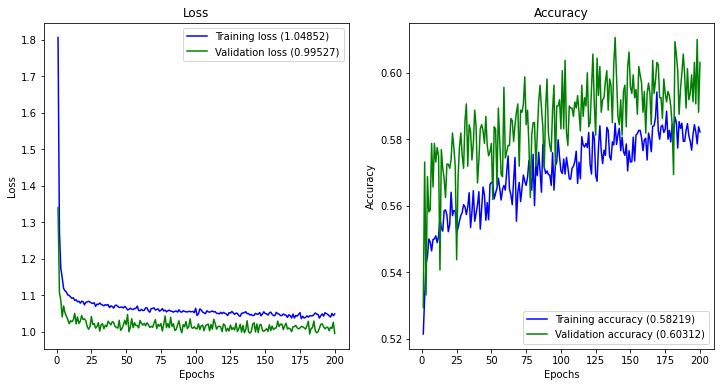

In [90]:
plot_history(history_l2_dropout)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.603125

Classification Report
              precision    recall  f1-score   support

           0    0.32558   0.17949   0.23140        78
           1    0.67720   0.73582   0.70529       670
           2    0.54255   0.66450   0.59736       614
           3    0.66667   0.22831   0.34014       219
           4    0.00000   0.00000   0.00000        19

    accuracy                        0.60313      1600
   macro avg    0.44240   0.36162   0.37484      1600
weighted avg    0.59890   0.60313   0.58242      1600

[[ 14  43  20   1   0]
 [ 16 493 160   1   0]
 [ 10 178 408  18   0]
 [  3  12 152  50   2]
 [  0   2  12   5   0]]


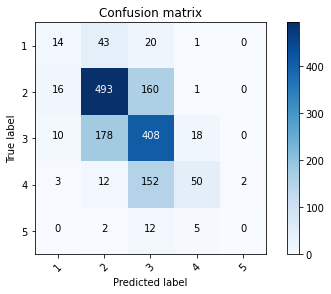

In [91]:
full_multiclass_report(l2_dropout_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.579

Classification Report
              precision    recall  f1-score   support

           0    0.17391   0.12371   0.14458        97
           1    0.65127   0.69565   0.67273       851
           2    0.54066   0.62675   0.58053       785
           3    0.55357   0.25101   0.34540       247
           4    0.00000   0.00000   0.00000        20

    accuracy                        0.57900      2000
   macro avg    0.38388   0.33943   0.34865      2000
weighted avg    0.56612   0.57900   0.56377      2000

[[ 12  58  25   2   0]
 [ 36 592 219   4   0]
 [ 20 234 492  39   0]
 [  1  23 161  62   0]
 [  0   2  13   5   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


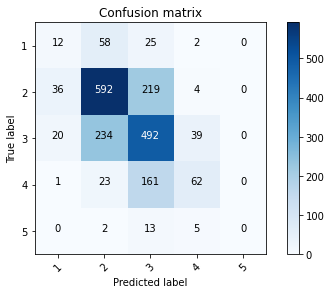

In [92]:
full_multiclass_report(l2_dropout_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

In [93]:
# evaluate the model
_, train_acc = l2_dropout_model.evaluate(normed_X_train, y_train_dummy, verbose=0)
_, test_acc = l2_dropout_model.evaluate(normed_X_test, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.608, Test: 0.579


- The combined L2 + Dropout model is also outperforming the larger model.

- We can attain a better score if we apply the Early Stopping callback to this model.

<a id=section405></a>
### 4.5 Batch Normalization

- Batch normalization is a technique for training very deep neural networks.

    - It **normalizes** the **activations** of the previous layer at each batch.

    - It applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.

- This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

- Batch normalization may be used on the inputs to the layer before or after the activation function in the previous layer.

- It may be more appropriate **after** the activation function for **s-shaped** functions like the **hyperbolic tangent** and **logistic** function.

- It may be more appropriate **before** the activation function for activations that may result in **non-Gaussian** distributions like the **rectified linear** activation function, the modern default for most network types.

- Since we are using **ReLU** activation function in our model, we will use the Batch Normalization layer **prior** to the ReLU layer.

In [94]:
def build_model():
  model = Sequential()
  model.add(Dense(256, input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Dense(output_shape, activation='softmax'))    

  return model
bnorm_model = build_model()

In [95]:
bnorm_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 256)               2816      
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
re_lu (ReLU)                 (None, 256)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)              

In [97]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)
# Compiling the model
bnorm_model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [98]:
history_batch_norm = bnorm_model.fit(normed_X_train, y_train_dummy, batch_size=200, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.5081,  loss:1.2140,  val_accuracy:0.5387,  val_loss:1.3579,  
....................
Epoch: 20, accuracy:0.7078,  loss:0.6735,  val_accuracy:0.5681,  val_loss:1.0603,  
....................
Epoch: 40, accuracy:0.8197,  loss:0.4426,  val_accuracy:0.5512,  val_loss:1.3798,  
....................
Epoch: 60, accuracy:0.8666,  loss:0.3359,  val_accuracy:0.5531,  val_loss:1.6280,  
....................
Epoch: 80, accuracy:0.9034,  loss:0.2540,  val_accuracy:0.5406,  val_loss:1.9159,  
....................
Epoch: 100, accuracy:0.9231,  loss:0.1989,  val_accuracy:0.5381,  val_loss:2.1329,  
....................
Epoch: 120, accuracy:0.9297,  loss:0.1851,  val_accuracy:0.5444,  val_loss:2.1847,  
....................
Epoch: 140, accuracy:0.9378,  loss:0.1636,  val_accuracy:0.5394,  val_loss:2.4191,  
....................
Epoch: 160, accuracy:0.9498,  loss:0.1380,  val_accuracy:0.5331,  val_loss:2.5645,  
....................
Epoch: 180, accuracy:0.9619,  loss:0.1073,  val_acc

In [99]:
hist_batch_norm = pd.DataFrame(history_batch_norm.history)
hist_batch_norm['epoch'] = history_batch_norm.epoch
hist_batch_norm.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,0.104980,0.961875,2.737991,0.551250,195
196,0.110289,0.961719,2.730772,0.546250,196
197,0.120348,0.959687,2.732689,0.533125,197
198,0.111626,0.960312,2.783297,0.532500,198
199,0.109619,0.959219,2.831091,0.542500,199


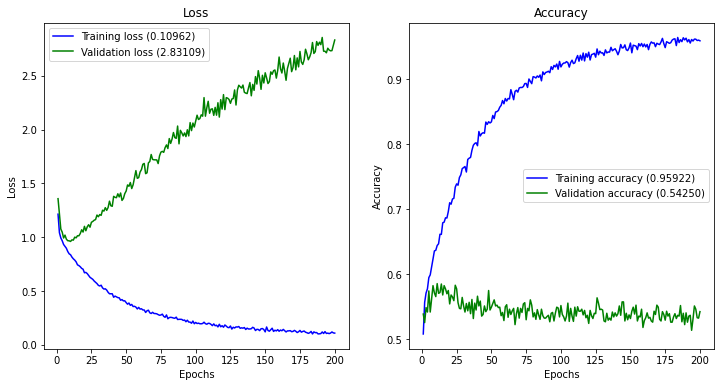

In [100]:
plot_history(history_batch_norm)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.5425

Classification Report
              precision    recall  f1-score   support

           0    0.24000   0.15385   0.18750        78
           1    0.61951   0.67313   0.64521       670
           2    0.50669   0.55537   0.52991       614
           3    0.46269   0.28311   0.35127       219
           4    0.13333   0.10526   0.11765        19

    accuracy                        0.54250      1600
   macro avg    0.39244   0.35414   0.36631      1600
weighted avg    0.53047   0.54250   0.53215      1600

[[ 12  43  22   1   0]
 [ 24 451 180  15   0]
 [  9 210 341  49   5]
 [  4  23 122  62   8]
 [  1   1   8   7   2]]


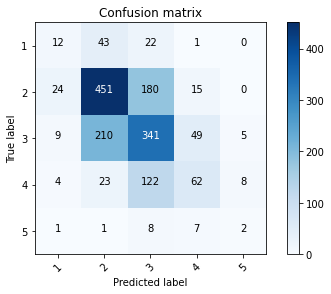

In [101]:
full_multiclass_report(bnorm_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.5565

Classification Report
              precision    recall  f1-score   support

           0    0.14103   0.11340   0.12571        97
           1    0.61481   0.68273   0.64699       851
           2    0.55402   0.56178   0.55787       785
           3    0.45562   0.31174   0.37019       247
           4    0.25000   0.15000   0.18750        20

    accuracy                        0.55650      2000
   macro avg    0.40310   0.36393   0.37765      2000
weighted avg    0.54467   0.55650   0.54795      2000

[[ 11  61  24   1   0]
 [ 42 581 213  15   0]
 [ 22 255 441  65   2]
 [  3  45 115  77   7]
 [  0   3   3  11   3]]


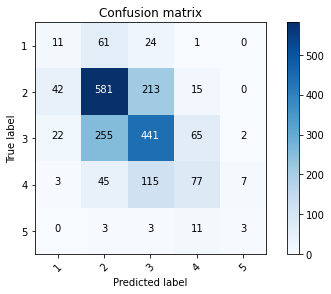

In [102]:
full_multiclass_report(bnorm_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

In [103]:
# evaluate the model
_, train_acc = bnorm_model.evaluate(normed_X_train, y_train_dummy, verbose=0)
_, test_acc = bnorm_model.evaluate(normed_X_test, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.988, Test: 0.557


- The Batch Normalization model attains the **lowest train set error**.

- We have seen significant **overfitting** here.

- It is not generalizing well on the test set.

- We can also incorporate the Early Stopping callback to this model to stop training at an appropriate epoch.

<a id=section5></a>
## 5. Hyperparamter Tuning

###Define and initiate HyperModel Class

In [ ]:
class MultiClassHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(
            layers.Dense(
                units=hp.Int('units', 8, 64, 4, default=8),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                input_shape=input_shape,
                kernel_initializer='zeros', bias_initializer='zeros'
            )
        )
        
        model.add(
            layers.Dense(
                units=hp.Int('units', 16, 64, 4, default=16),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                kernel_initializer='zeros', bias_initializer='zeros'
            )
        )
        
        model.add(
            layers.Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    default=0.005,
                    step=0.01)
            )
        )
        
        model.add(Dense(y_train_dummy.shape[1], activation='softmax'))


        model.compile( optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
        
        return model

In [ ]:
hypermodel = MultiClassHyperModel(normed_train_data.shape[1])

###Build, Run and Evaluate Random Search Tuner

In [ ]:
tuner_rs = RandomSearch(
            hypermodel,
            objective='val_accuracy',
            seed=42,
            max_trials=10,
            executions_per_trial=2, overwrite=True
        )

tuner_rs.search(normed_train_data, y_train_dummy, epochs=10, validation_split=0.2, verbose=0)
best_model = tuner_rs.get_best_models(num_models=1)[0]
val_rs = best_model.evaluate(normed_test_data, y_test_dummy)[1]
print('Random search Val Accuracy: ', val_rs)

predictions = best_model.predict(normed_test_data[:3])
print("predictions shape:", predictions.shape)
print(predictions)
normed_test_data[:3]

###Build, Run and Evaluate Hyperband Tuner

In [ ]:
tuner_hb = Hyperband(
            hypermodel,
            max_epochs=5,
            objective='val_accuracy',
            seed=42,
            executions_per_trial=2,
            directory='hb'
        )
tuner_hb.search(normed_train_data, y_train_dummy, epochs=10, validation_split=0.2, verbose=0)
best_model = tuner_hb.get_best_models(num_models=1)[0]
val_rs = best_model.evaluate(normed_test_data, y_test_dummy)[1]
print('Random search Val Accuracy: ', val_rs)

predictions = best_model.predict(normed_test_data[:3])
print("predictions shape:", predictions.shape)
print(predictions)
normed_test_data[:3]

###Build, Run and Evaluate Bayesian Optimization Tuner

In [ ]:
tuner_bo = BayesianOptimization(
            hypermodel,
            objective='val_accuracy',
            max_trials=10,
            seed=42,
            executions_per_trial=2,
            directory='bo'
        )

tuner_bo.search(normed_train_data, y_train_dummy, epochs=10, validation_split=0.2, verbose=0)
best_model = tuner_bo.get_best_models(num_models=1)[0]
val_rs = best_model.evaluate(normed_test_data, y_test_dummy)[1]
print('Random search Val Accuracy: ', val_rs)

predictions = best_model.predict(normed_test_data[:3])
print("predictions shape:", predictions.shape)
print(predictions)
normed_test_data[:3]

<a id=section6></a>
## 6. Conclusion

We studied a few techniques to handle a regression problem.

- **Mean Squared Error** (MSE) is a common loss function used for regression problems (different loss functions are used for classification problems).

- Similarly, evaluation metrics used for regression differ from classification.

  - A common regression metric is **Mean Absolute Error** (MAE).

- When numeric input data features have values with different ranges, each **feature** should be **scaled** independently to the same range.

- If there is not much training data, one technique is to prefer a **small network** with few hidden layers to avoid overfitting.

- **Early stopping** is a useful technique to prevent overfitting.

- We can improve the performance of a model by increasing the number of hidden layers and the hidden units in the model.

- Regularization Techniques to reduce overfitting are:

  - **Weight Regularization**

  - **Dropout**

  - **Batch Normalization**